# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

In [2]:
learn = pd.read_csv("ExtraaLearn.csv") ##  read the data

In [3]:
# copying data to another variable to avoid any changes to original data
data = learn.copy()

### View the first and last 10 rows of the dataset to have insight of the data

In [4]:
data.head(10) ##  View top 10 rows of the data

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0
5,EXT006,50,Unemployed,Mobile App,High,4,212,5.68200,Phone Activity,No,No,No,Yes,No,0
6,EXT007,56,Professional,Mobile App,Medium,13,625,2.01500,Website Activity,No,No,Yes,No,No,1
7,EXT008,57,Professional,Mobile App,Medium,2,517,2.98500,Email Activity,No,No,No,No,No,0
8,EXT009,57,Professional,Mobile App,High,2,2231,2.19400,Phone Activity,No,No,Yes,No,No,1
9,EXT010,59,Professional,Mobile App,High,1,1819,3.51300,Phone Activity,No,No,No,No,No,0


In [5]:
data.tail(10) ##  View last 10 rows of the data  

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4602,EXT4603,47,Professional,Website,Medium,4,339,2.06800,Email Activity,No,No,No,No,No,0
4603,EXT4604,26,Professional,Website,Medium,4,150,2.14900,Website Activity,No,No,No,No,No,0
4604,EXT4605,58,Professional,Website,Medium,2,555,3.30500,Website Activity,No,No,No,No,No,1
4605,EXT4606,49,Professional,Mobile App,Medium,5,253,3.67700,Website Activity,No,No,No,No,No,0
4606,EXT4607,58,Unemployed,Mobile App,High,7,210,3.59800,Email Activity,No,No,No,No,No,0
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


### Understand the shape of the dataset

In [6]:
data.shape ## View the shape of data

(4612, 15)

### Check the data types of the columns for the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

we have four int data type, one float data type and 10 object type

In [8]:
# checking for duplicate values
data.duplicated().sum() ## Complete the code to check duplicate entries in the data

0

This shows that there are no duplicate rows.

In [9]:
data.isna().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

This shows that there are no missing data.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [10]:
data.isna().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

This shows that there are no missing data.

**Let's check the statistical summary of the data.**

In [11]:
data.describe() ##   print the statistical summary of the data

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000
mean,46.20121,3.56678,724.01127,3.02613,0.29857
std,13.16145,2.82913,743.82868,1.96812,0.45768
min,18.00000,0.00000,0.00000,0.00000,0.00000
25%,36.00000,2.00000,148.75000,2.07775,0.00000
50%,51.00000,3.00000,376.00000,2.79200,0.00000
75%,57.00000,5.00000,1336.75000,3.75625,1.00000
max,63.00000,30.00000,2537.00000,18.43400,1.00000


In [12]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: ID, Length: 4612, dtype: int64
--------------------------------------------------
Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
--------------------------------------------------
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64
--------------------------------------------------
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64
--------------------------------------------------
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64
--------------------------------------------------
No     4115
Yes     497
Name: print_media_type1, dtype: int64
--------------------------------------------------
No     4379
Yes     233
Name: print_media_type2, dtype: int64
--------------------

In [13]:
# checking the number of unique values
data["ID"].nunique() # Complete the code to check the number of unique values

4612

There are 4612 unique data, no nan and there is no duplicate data.

In [14]:
data.drop(["ID"], axis = 1, inplace = True)# Complete the code to drop "ID" column from data

The ID column is unique and important for data collection but will not be useful for data modelling therefore it will be dropped.

In [15]:
# view the new data
data.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


### Univariate Analysis

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on age

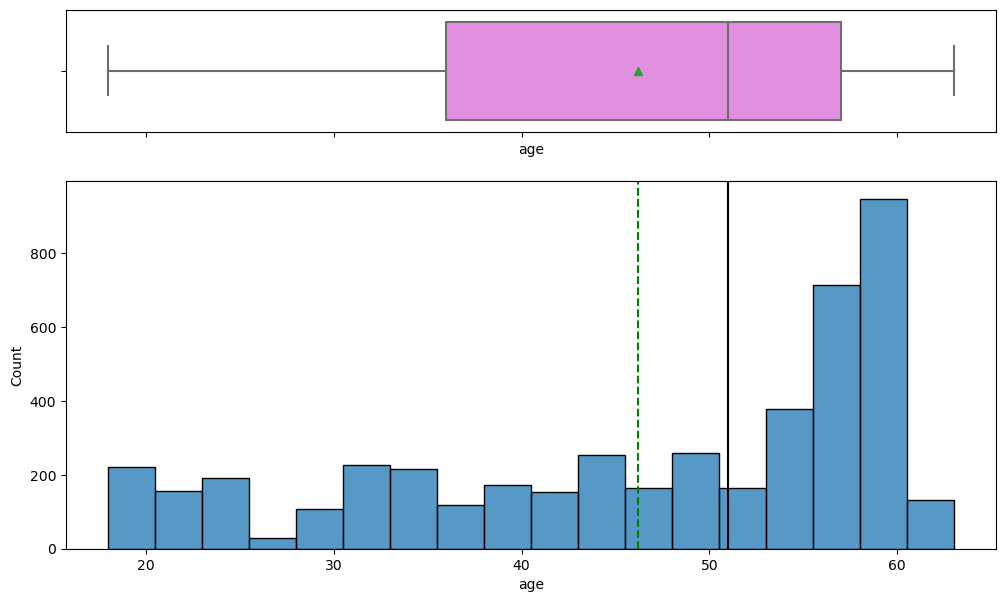

In [17]:
histogram_boxplot(data, "age") 

### Observations on website_visits

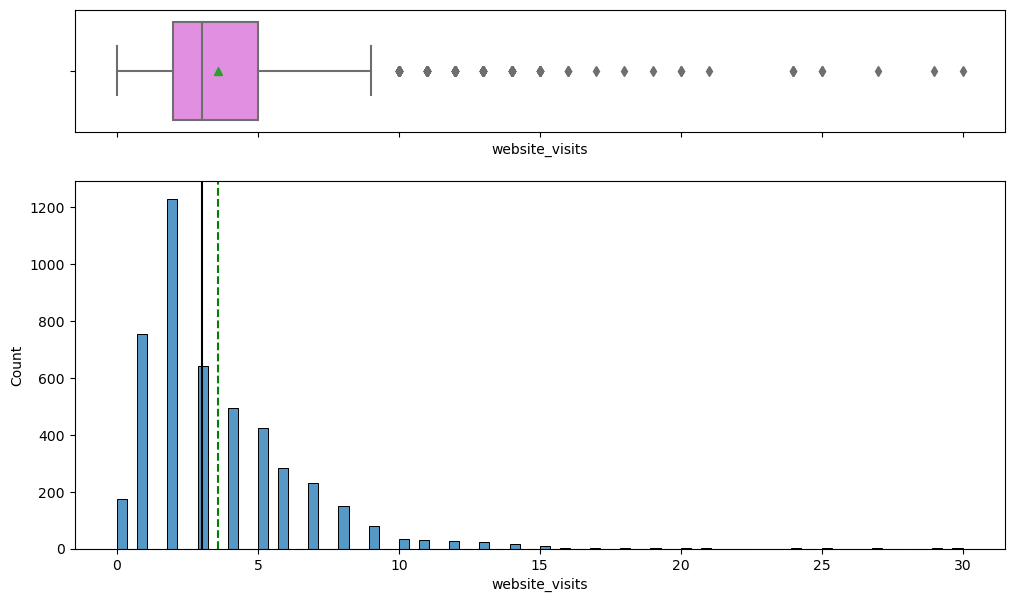

In [18]:
histogram_boxplot(data, 'website_visits') # plot a histogram_boxplot for website_visits

In [19]:
# To check how many leads have not visited web-site
data[data["website_visits"] == 0].shape

(174, 14)

### Observations on number of time_spent_on_website

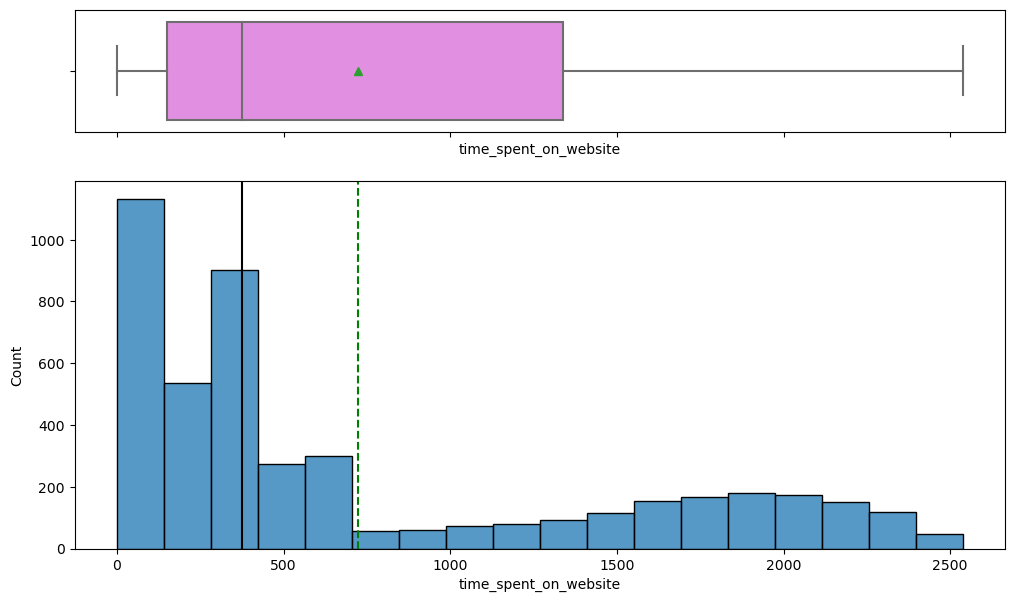

In [20]:
histogram_boxplot(data, 'time_spent_on_website') # plot a histogram_boxplot for time_spent_on_website

### Observations on number of page_views_per_visit

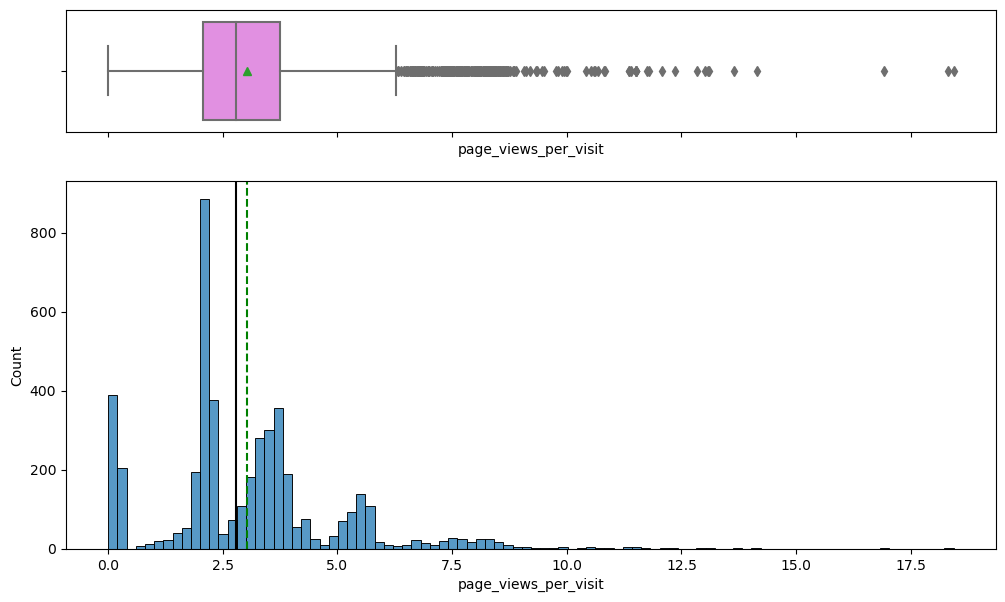

In [21]:
histogram_boxplot(data,'page_views_per_visit') # Complete the code to plot a histogram_boxplot for page_views_per_visit

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on current_occupation

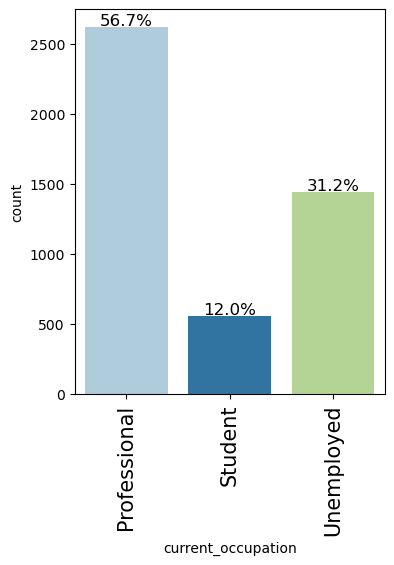

In [23]:
labeled_barplot(data, "current_occupation", perc=True)

This shows that the number of professionals is more than the sum of unemployed and students and the number of unemployed is more than twice the number of students.

### Observations on number of first_interaction

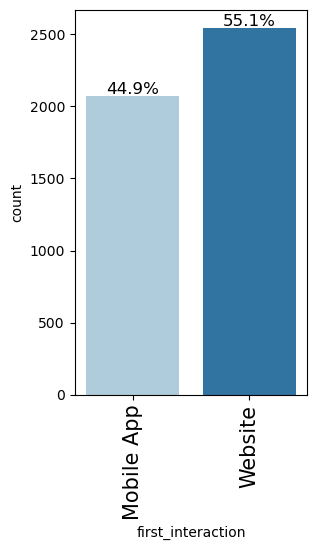

In [24]:
labeled_barplot(data, "first_interaction", perc=True) # plot labeled_barplot for first_interaction

This shows that more people visited the website than the people that used mobile app.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 504.6+ 

### Observations on profile_completed

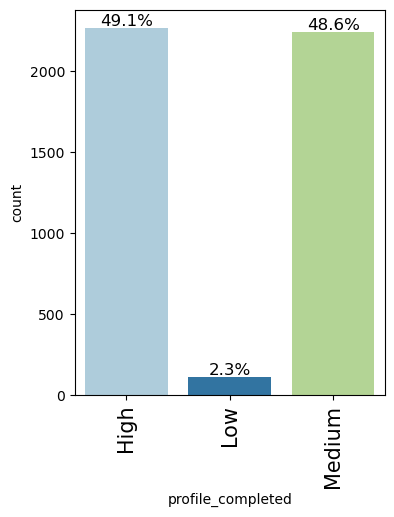

In [26]:
labeled_barplot(data, "profile_completed", perc=True) # plot labeled_barplot for profile_completed

This shows that the medium and high classification od profile completed are very close although the high classification is slightly higher than the medium but the low is less than one twentieth of any of the high and medium class.

### Observations on last_activity

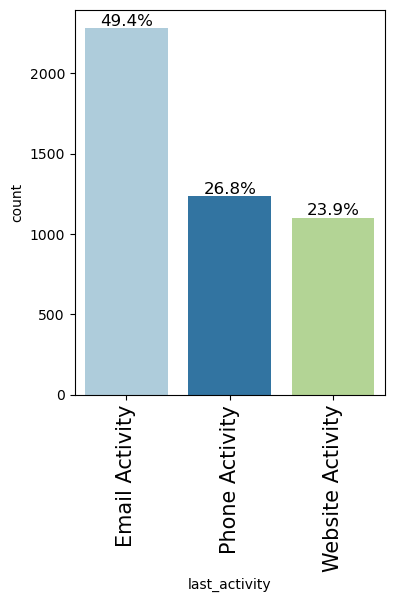

In [27]:
labeled_barplot(data, "last_activity", perc=True) # plot labeled_barplot for last_activity

This shows that email activity is approxiamtely 50% while phone activity is slightly higher than website activity.

### Observations on print_media_type1

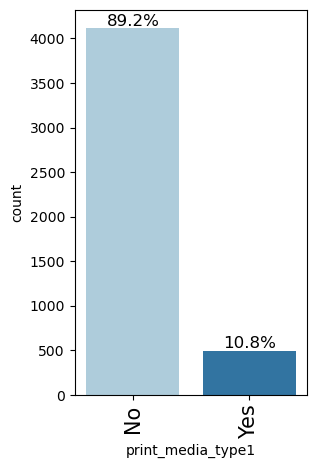

In [28]:
labeled_barplot(data, "print_media_type1", perc=True) # plot labeled_barplot for print_media_type1

This shows that the lead that saw the ad of ExtraaLearn in the Newspaper is 10.8% which is approximately one tenth of the leads.

### Observations on print_media_type2

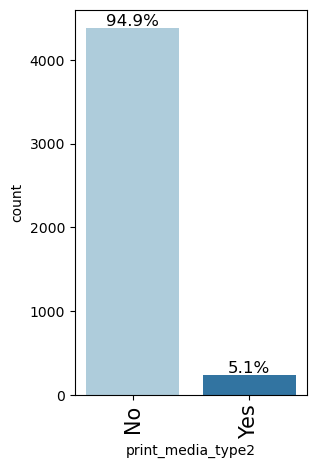

In [29]:
labeled_barplot(data, "print_media_type2", perc=True) # plot labeled_barplot for print_media_type2

This shows that the lead that saw the ad of ExtraaLearn in the Magazine is 5.1% which is approximately one twentieth of the total leads and approxiamtely half of leads that saw the ads on Newspaper.

### Observations on digital_media

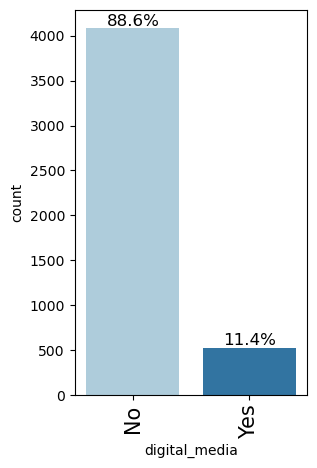

In [30]:
labeled_barplot(data, "digital_media", perc=True) # plot labeled_barplot for digital_media

This shows that the lead that saw the ad of ExtraaLearn in the Digital media is 11.4% which is approximately one tenth of the total leads.

### Observations on educational_channels

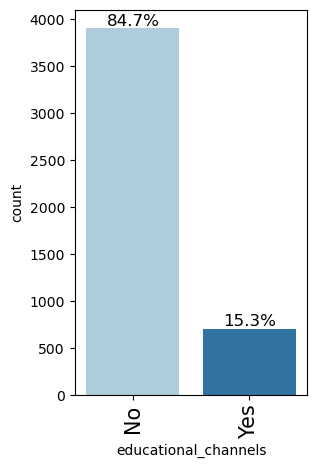

In [31]:
labeled_barplot(data, "educational_channels", perc=True) # plot labeled_barplot for educational_channels

This shows that the lead that saw the ad of ExtraaLearn in the Educational channels is 11.4% which is approximately one tenth of the total leads.

### Observations on referral

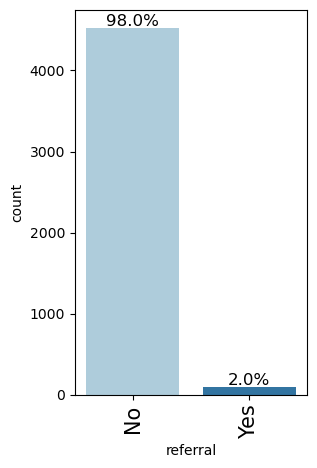

In [32]:
labeled_barplot(data, "referral", perc=True) # plot labeled_barplot for referral

This shows that only 2% learn about the program through referral

### Observations on status

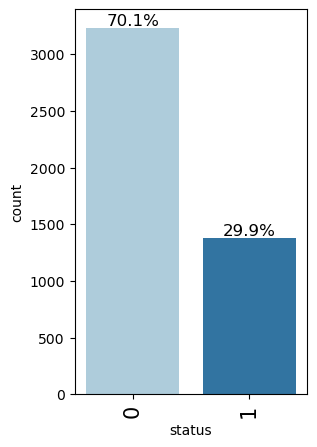

In [33]:
labeled_barplot(data, "status", perc=True) # plot labeled_barplot for status

This shows that the data of leads collected has only 29.9% conversion.

**Observations from Univariate Analysis:From the various ways of learning or getting informed about the program Educational channel, digital media and newspaper are the top three while referral is the least while most leads first interacted through website and close number of leads also interacted through mobile app. Professionals are much more likely to be leads followed by unemployed while students are the least**

### Bivariate Analysis

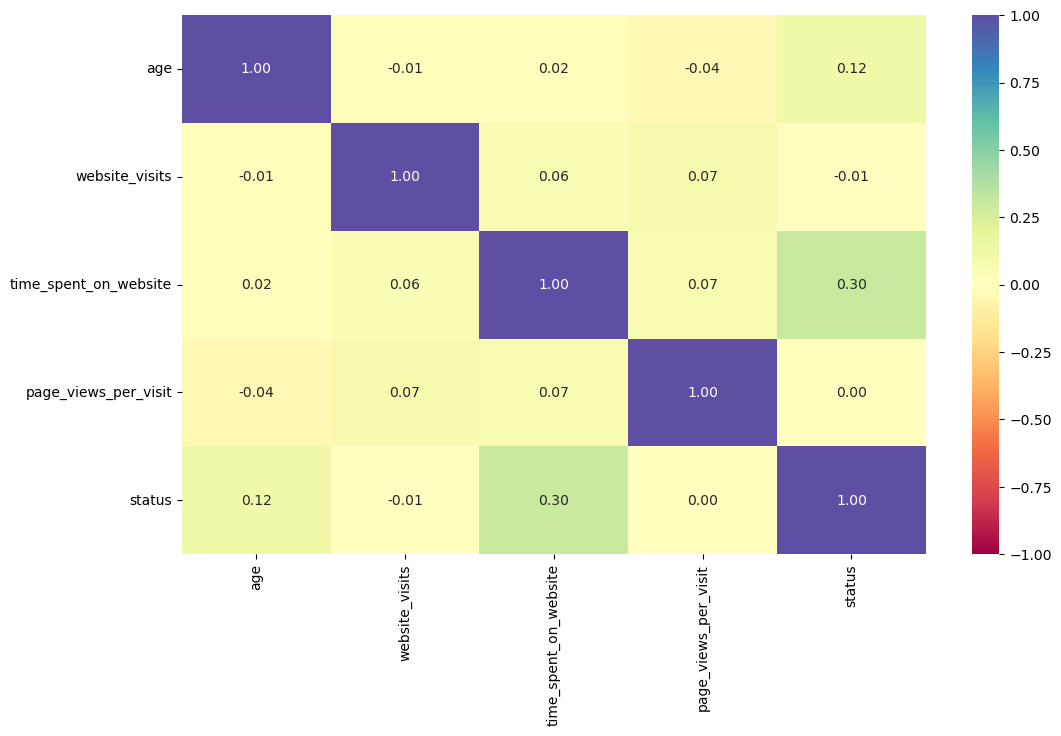

In [34]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

The heat map shows that there is no strong correlation between the variables that are collected to predict the target cloumn ( Status). The correlation of time spent on the website to status is 0.3 and this is the highest followed by age which is approxiately its half (0.12). as others are considerablely low.

**Creating functions that will help us with further analysis.**

In [35]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [36]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Leads will have different expectations from the outcome of the course and the current occupation may play a key role for them to take the program. Let's analyze it**

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


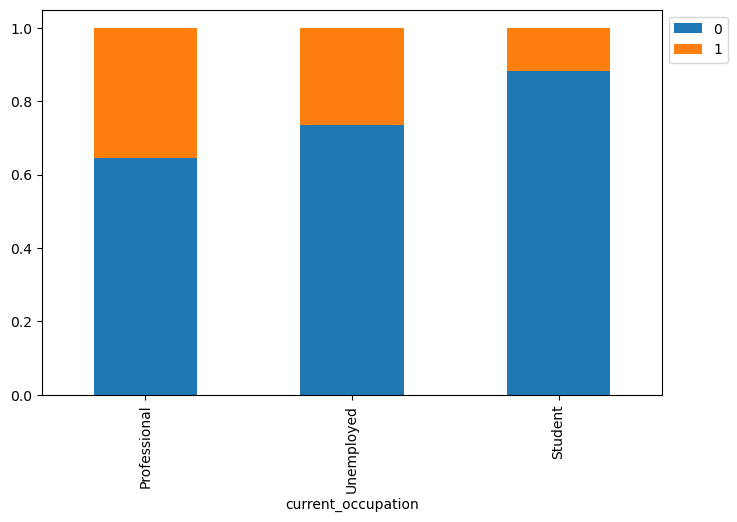

In [37]:
stacked_barplot(data, "current_occupation", "status")

The % conversion of professional leads is the highest and is closely followed by that of the unemployed while the conversion rate of student leads has the least in this classification

**Age can be a good factor to differentiate between such leads**

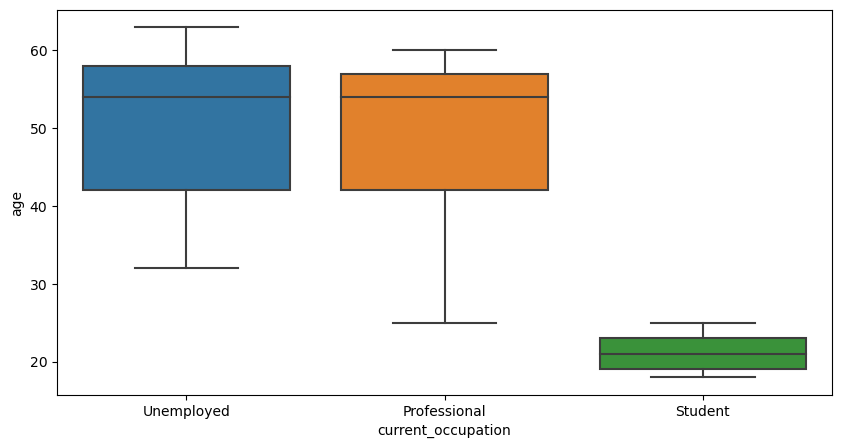

In [38]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, x = data["current_occupation"], y = data["age"])
plt.show()

In [39]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


The median age of student in this data is 21 while that of professional and unemployed is 42. The minimum age of professional lead is the maximum age of student which is 25 years and is even in the outlier for the two sections.

**The company's first interaction with leads should be compelling and persuasive. Let's see if the channels of the first interaction have an impact on the conversion of leads**

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


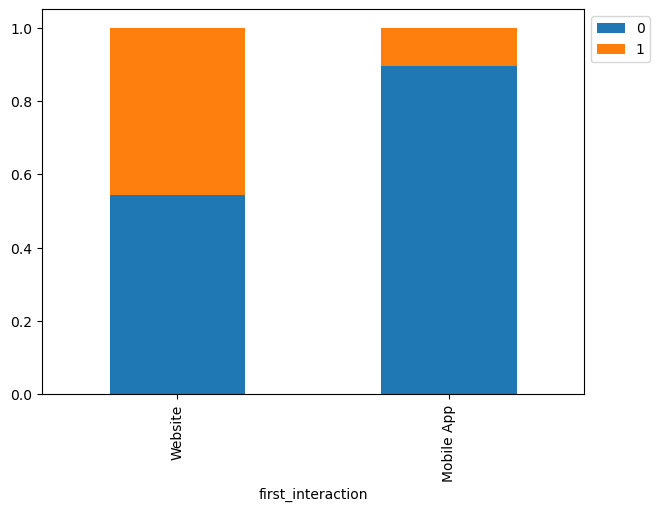

In [40]:
stacked_barplot(data, "first_interaction", "status") # plot stacked_barplot for first_interaction and status

The number of leads converted from website usage for first interaction  is more than twice that of mobile app

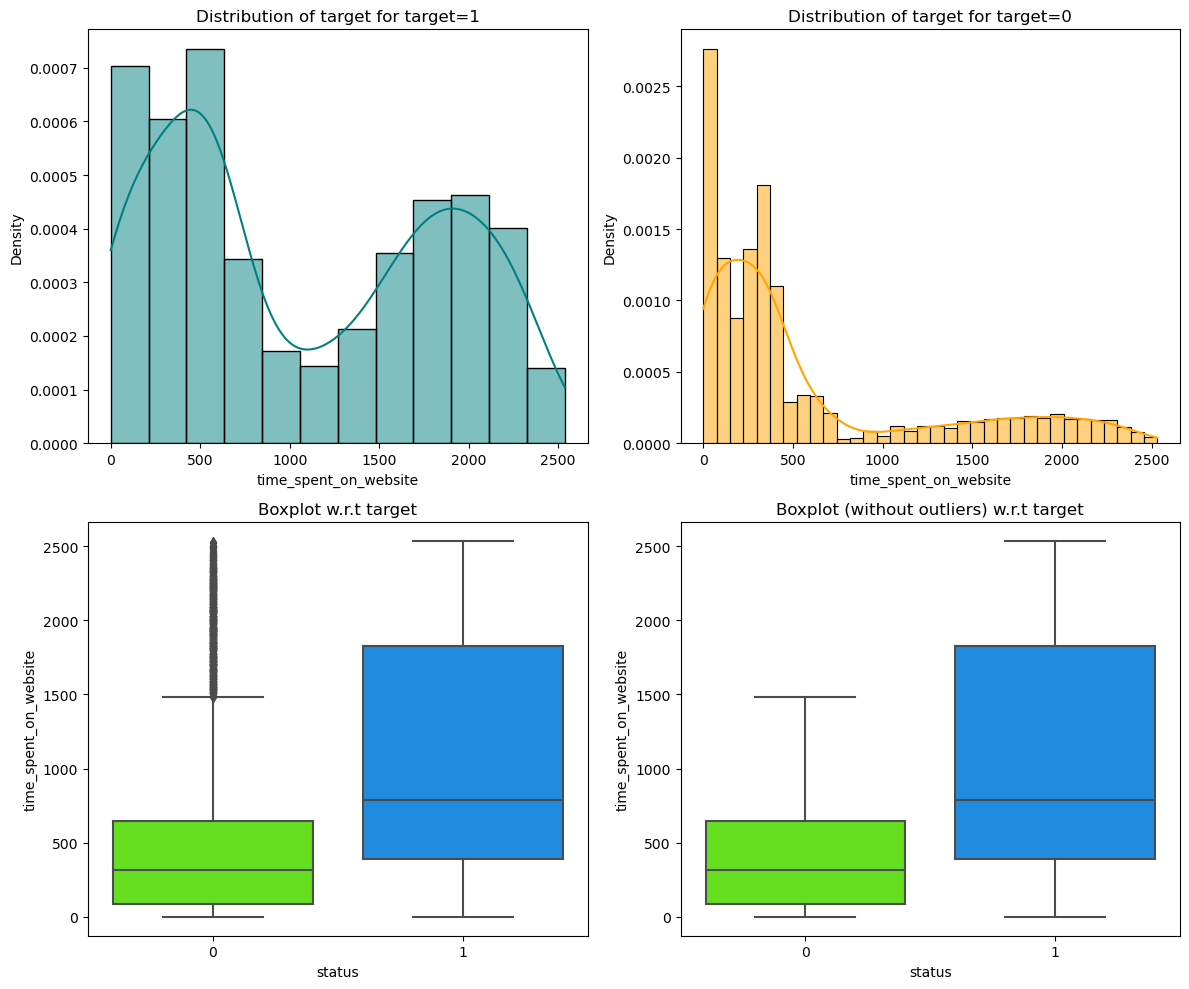

In [41]:
distribution_plot_wrt_target(data, "time_spent_on_website", "status")

In [42]:
# checking the median value
data.groupby(["status"])["time_spent_on_website"].median()

status
0   317.00000
1   789.00000
Name: time_spent_on_website, dtype: float64

**Let's do a similar analysis for time spent on website and page views per visit.**

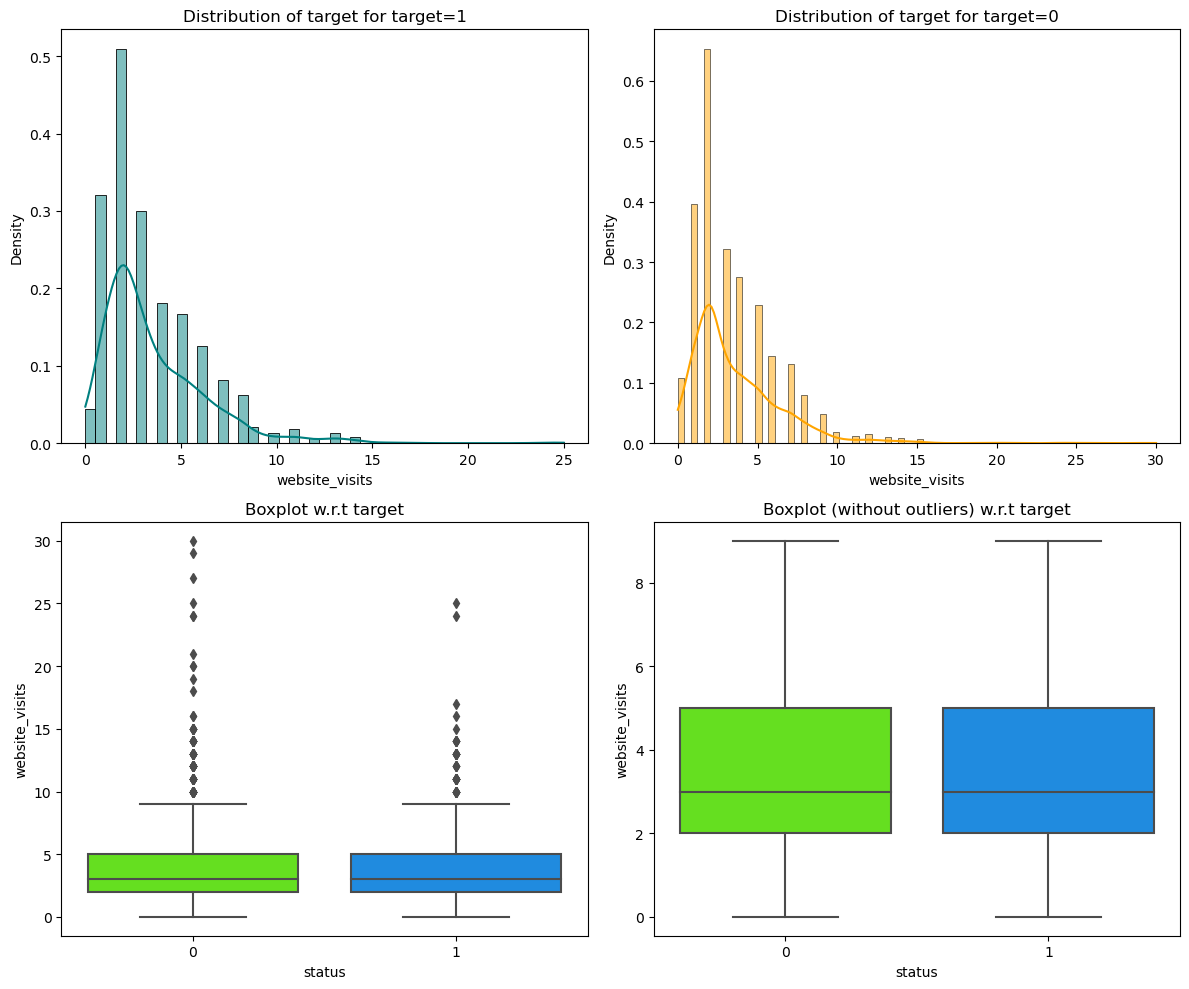

In [43]:
distribution_plot_wrt_target(data, "website_visits", "status") # plot distribution for website_visits and status

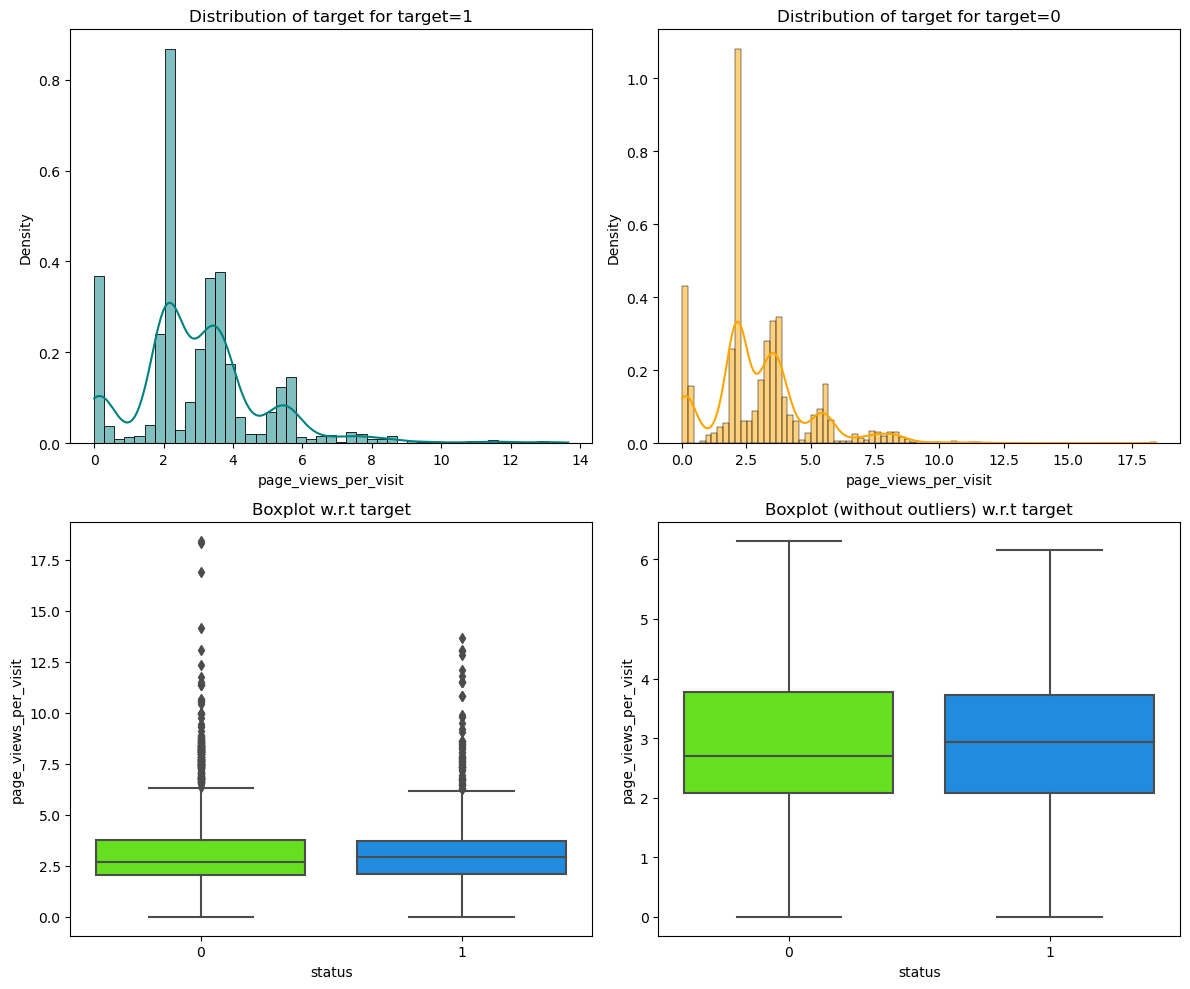

In [44]:
distribution_plot_wrt_target(data, "page_views_per_visit", "status") # plot distribution for page_views_per_visit and status

**People browsing the website or the mobile app are generally required to create a profile by sharing their personal details before they can access more information. Let's see if the profile completion level has an impact on lead status**

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


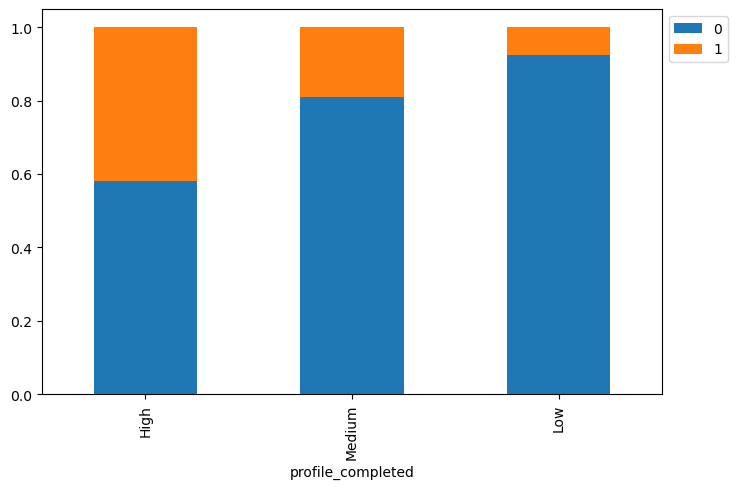

In [45]:
stacked_barplot(data, "profile_completed", "status")  # plot stacked_barplot for profile_completed and status

**After a lead shares their information by creating a profile, there may be interactions between the lead and the company to proceed with the process of enrollment. Let's see how the last activity impacts lead conversion status**

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


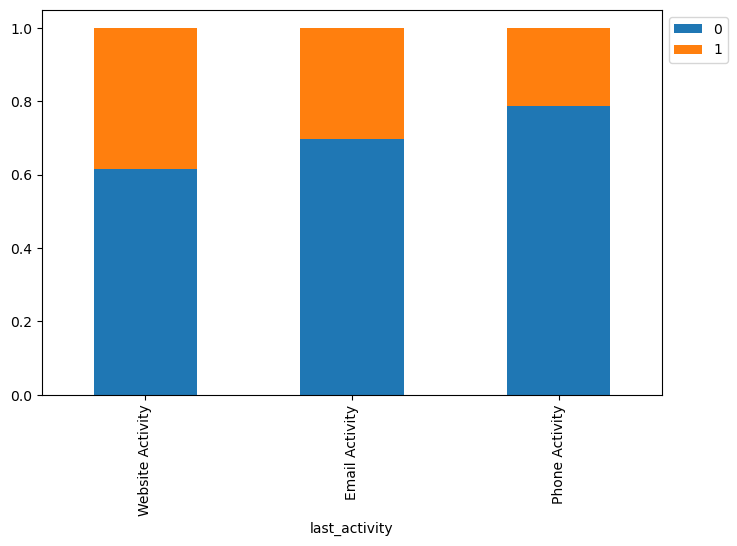

In [46]:
stacked_barplot(data, "last_activity", "status") # plot stacked_barplot for last_activity and status

Website activity has the highest lead conversion to learner, followed by email activity and the least is phone activity.

**Let's see how advertisement and referrals impact the lead status**

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


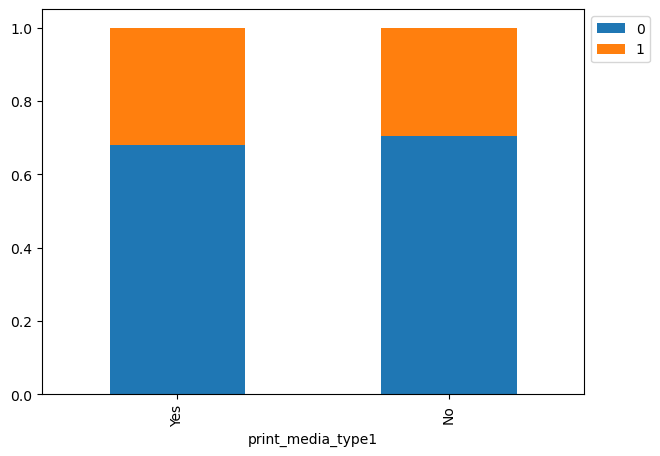

In [47]:
stacked_barplot(data, "print_media_type1", "status") # plot stacked_barplot for print_media_type1 and status

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


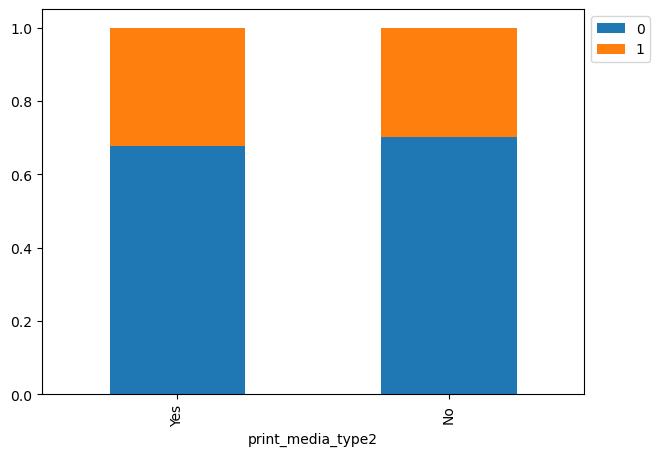

In [48]:
stacked_barplot(data, "print_media_type2", "status") # plot stacked_barplot for print_media_type2 and status

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


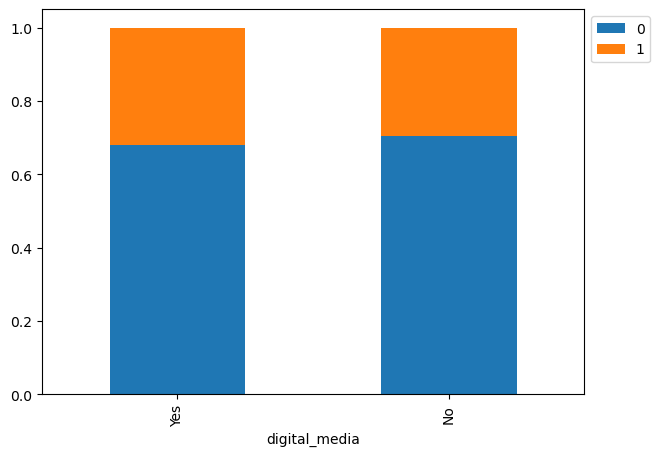

In [49]:
stacked_barplot(data, "digital_media", "status") # plot stacked_barplot for digital_media and status

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


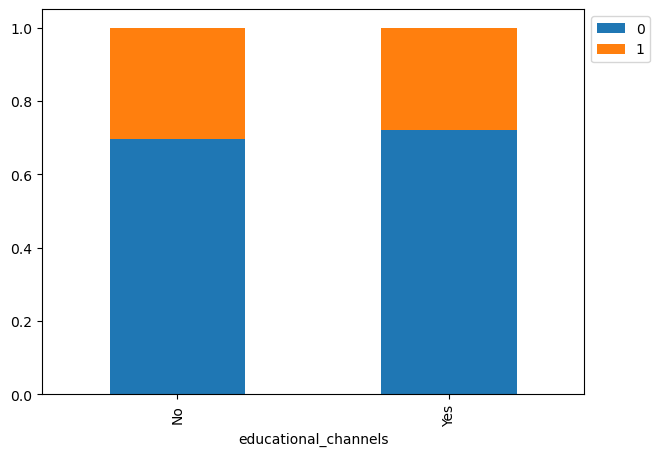

In [50]:
stacked_barplot(data, "educational_channels", "status") # stacked_barplot for educational_channels and status

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


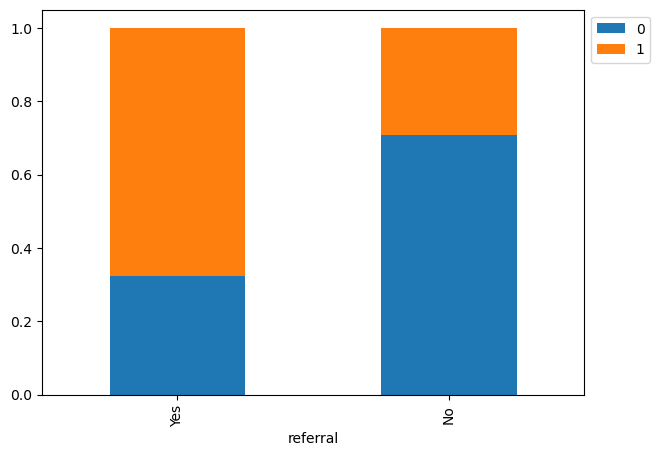

In [51]:
stacked_barplot(data, "referral", "status") # Complete the code to plot stacked_barplot for referral and status

The percent of leads converted to learners is more among the leads that were informed by referral than those that are not.

### Outlier Check

- Let's check for outliers in the data.

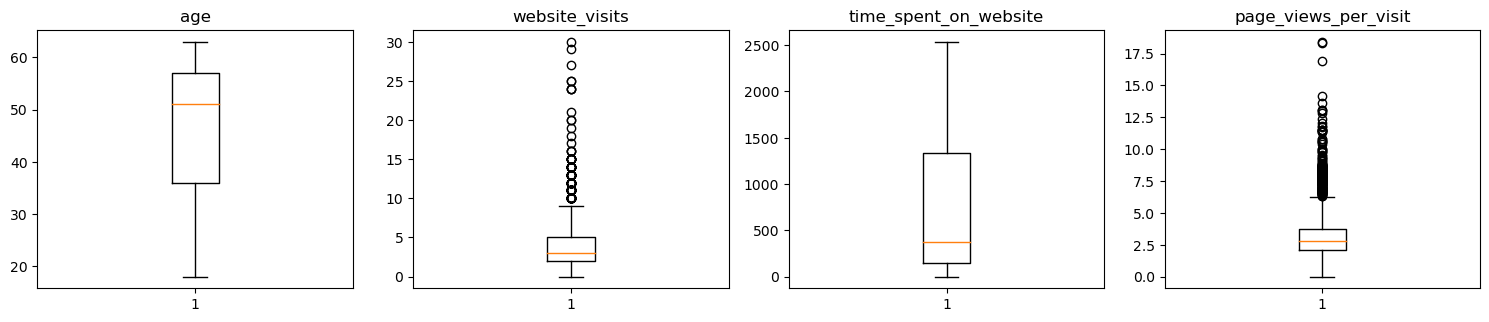

In [52]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:The website visit and page views per visit has the highest form of outliers.**

### Data Preparation for modeling

- We want to predict which lead is more likely to be converted.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 504.6+ 

In [54]:
X = data.drop(["status"], axis=1)
Y = data['status'] # define the dependent (target) variable

X = pd.get_dummies(X, drop_first=True) # get dummies for X

# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [55]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
0   0.70415
1   0.29585
Name: status, dtype: float64
Percentage of classes in test set:
0   0.69509
1   0.30491
Name: status, dtype: float64


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [56]:
data.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


## Building a Decision Tree model

In [57]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

## Decision Tree

### Building Decision Tree Model

In [58]:
# Fitting the decision tree classifier on the training data
d_tree =  DecisionTreeClassifier()

d_tree.fit(X_train, y_train)

DecisionTreeClassifier()

#### Checking model performance on training set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



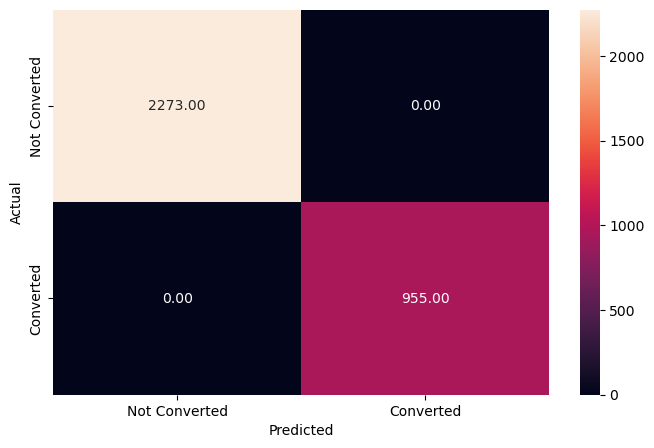

In [59]:
# Checking performance on the training data
# y_pred_train1 = ___________

# metrics_score(y_train, y_pred_train1)
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

**Observations: 
Precision: The precision for both classes (0 and 1) is 1.00, indicating that the model has correctly predicted all the positive (converted) instances and all the negative (not converted) instances in the training data.

Recall: The recall for both classes is 1.00, which means that the model has identified and correctly predicted all the positive instances (converted leads) and all the negative instances (not converted leads) in the training data.

F1-Score: The F1-score for both classes is 1.00, which is the harmonic mean of precision and recall. The perfect F1-score indicates that the model has achieved a balance between precision and recall for both classes.

Support: The support represents the number of instances in each class. In this case, the model has 2273 instances of class 0 (not converted leads) and 955 instances of class 1 (converted leads) in the training data.

Accuracy: The overall accuracy of the model on the training data is 1.00, indicating that it has achieved a perfect accuracy by correctly predicting all instances.

Based on these observations, it seems that the decision tree model is performing extremely well on the training data, achieving perfect precision, recall, and accuracy. However, it's important to assess the model's performance on unseen data (testing data) to check for overfitting and validate its generalization ability.



**


**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       962
           1       0.68      0.70      0.69       422

    accuracy                           0.81      1384
   macro avg       0.77      0.78      0.77      1384
weighted avg       0.81      0.81      0.81      1384



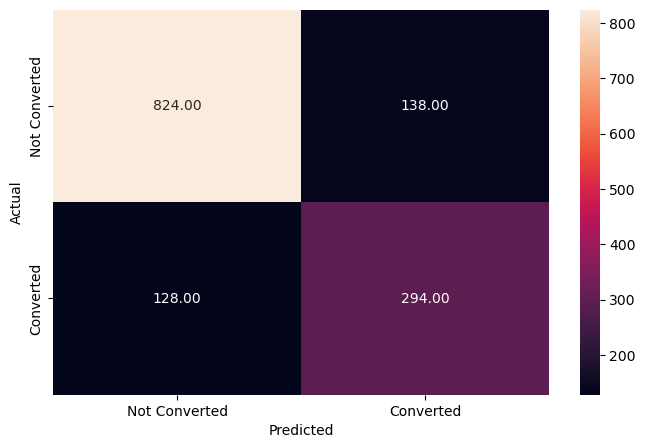

In [60]:
# Checking performance on the testing data
# y_pred_test1 = ___________

# ___________
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

**Observations:Based on the performance of the decision tree model on the testing dataset, the following observations can be made:

Precision: For class 0 (not converted leads), the precision is 0.86, indicating that 86% of the instances predicted as not converted leads are actually not converted leads. For class 1 (converted leads), the precision is 0.70, indicating that 70% of the instances predicted as converted leads are actually converted leads.

Recall: For class 0, the recall is 0.87, indicating that the model has identified and correctly predicted 87% of the actual not converted leads. For class 1, the recall is 0.68, indicating that the model has identified and correctly predicted 68% of the actual converted leads.

F1-Score: The F1-score for class 0 is 0.87, which is the harmonic mean of precision and recall. It represents the overall balance between precision and recall for predicting not converted leads. The F1-score for class 1 is 0.69, indicating the overall balance for predicting converted leads.

Support: The support represents the number of instances in each class. In this case, there are 962 instances of class 0 (not converted leads) and 422 instances of class 1 (converted leads) in the testing data.

Accuracy: The overall accuracy of the model on the testing data is 0.81, indicating that it has correctly predicted 81% of the instances in the testing dataset.

Macro Avg and Weighted Avg: The macro average F1-score and accuracy are both 0.78, indicating the average performance across both classes. The weighted average F1-score and accuracy are 0.81, taking into account the class imbalance in the dataset.**

**Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth** to reduce overfitting of the model. We can tune some other hyperparameters as well.

### **Decision Tree - Hyperparameter Tuning**

We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is approximately the opposite of the imbalance in the original data. 

**This would tell the model that 1 is the important class here.**

In [61]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

We have tuned the model and fit the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

#### Checking model performance on train and test set

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



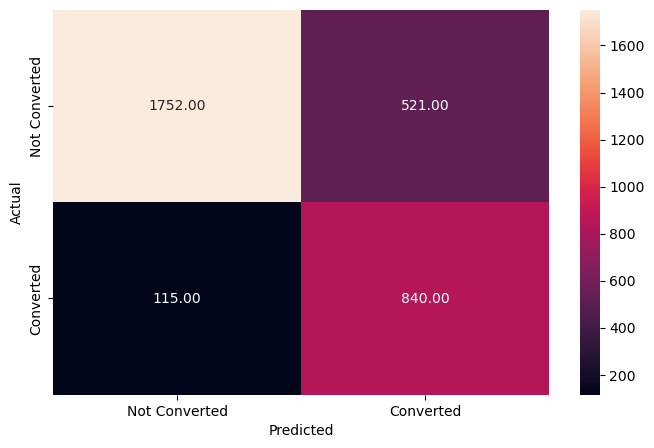

In [62]:
# Checking performance on the training data
# y_pred_train2 = ___________

# ___________
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

**Observations:After hyperparameter tuning of the decision tree model on the training dataset, the following observations can be made:

Precision: For class 0 (not converted leads), the precision is 0.94, indicating that 94% of the instances predicted as not converted leads are actually not converted leads. For class 1 (converted leads), the precision is 0.62, indicating that 62% of the instances predicted as converted leads are actually converted leads.

Recall: For class 0, the recall is 0.77, indicating that the model has identified and correctly predicted 77% of the actual not converted leads. For class 1, the recall is 0.88, indicating that the model has identified and correctly predicted 88% of the actual converted leads.

F1-Score: The F1-score for class 0 is 0.85, which is the harmonic mean of precision and recall. It represents the overall balance between precision and recall for predicting not converted leads. The F1-score for class 1 is 0.73, indicating the overall balance for predicting converted leads.

Support: The support represents the number of instances in each class. In this case, there are 2273 instances of class 0 (not converted leads) and 955 instances of class 1 (converted leads) in the training data.

Accuracy: The overall accuracy of the model on the training data is 0.80, indicating that it has correctly predicted 80% of the instances in the training dataset.

Macro Avg and Weighted Avg: The macro average F1-score is 0.79, indicating the average performance across both classes. The weighted average F1-score is 0.81, taking into account the class imbalance in the dataset.

Based on these observations, it seems that the hyperparameter tuning of the decision tree model has resulted in improved performance compared to the initial model. The model shows better recall for class 1 (converted leads) after tuning, indicating a higher ability to identify converted leads. However, there is a slight decrease in precision for class 1, indicating a higher chance of false positives.

Overall, the tuned model shows a good balance between precision and recall, achieving a reasonably high accuracy on the training data. It's important to evaluate the model's performance on the testing data to assess its generalization ability and check for overfitting.**

**Let's check the model performance on the testing data**

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



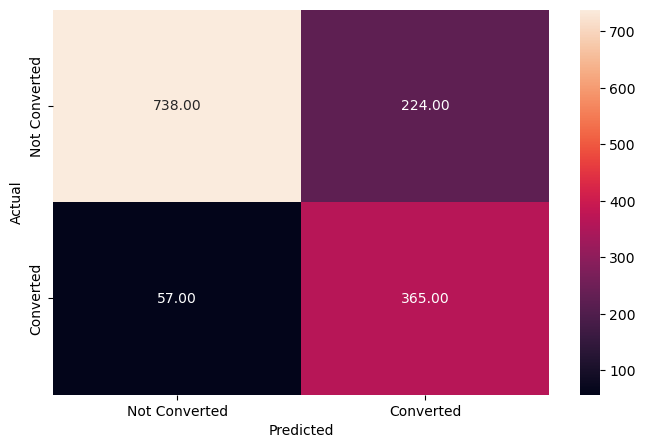

In [63]:
# Checking performance on the testing data
# y_pred_test2 = ___________

# ___________
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)

**Observations:Based on the performance of the tuned decision tree model on the testing dataset, the following observations can be made:

Precision: For class 0 (not converted leads), the precision is 0.93, indicating that 93% of the instances predicted as not converted leads are actually not converted leads. For class 1 (converted leads), the precision is 0.62, indicating that 62% of the instances predicted as converted leads are actually converted leads.

Recall: For class 0, the recall is 0.77, indicating that the model has identified and correctly predicted 77% of the actual not converted leads. For class 1, the recall is 0.86, indicating that the model has identified and correctly predicted 86% of the actual converted leads.

F1-Score: The F1-score for class 0 is 0.84, which is the harmonic mean of precision and recall. It represents the overall balance between precision and recall for predicting not converted leads. The F1-score for class 1 is 0.72, indicating the overall balance for predicting converted leads.

Support: The support represents the number of instances in each class. In this case, there are 962 instances of class 0 (not converted leads) and 422 instances of class 1 (converted leads) in the testing data.

Accuracy: The overall accuracy of the model on the testing data is 0.80, indicating that it has correctly predicted 80% of the instances in the testing dataset.

Macro Avg and Weighted Avg: The macro average F1-score is 0.78, indicating the average performance across both classes. The weighted average F1-score is 0.80, taking into account the class imbalance in the dataset.

Based on these observations, it seems that the tuned decision tree model performs relatively well on the testing data. The model shows a good balance between precision and recall, with reasonably high accuracy. However, there is a slight decrease in precision and F1-score compared to the training data, indicating a higher chance of false positives and a slightly lower overall performance on the testing data.

It's important to note that the model's performance on the testing data is consistent with its performance on the training data, which suggests that the model is not overfitting.**

### Visualizing the Decision Tree

**Let's visualize the tuned decision tree** and observe the decision rules:

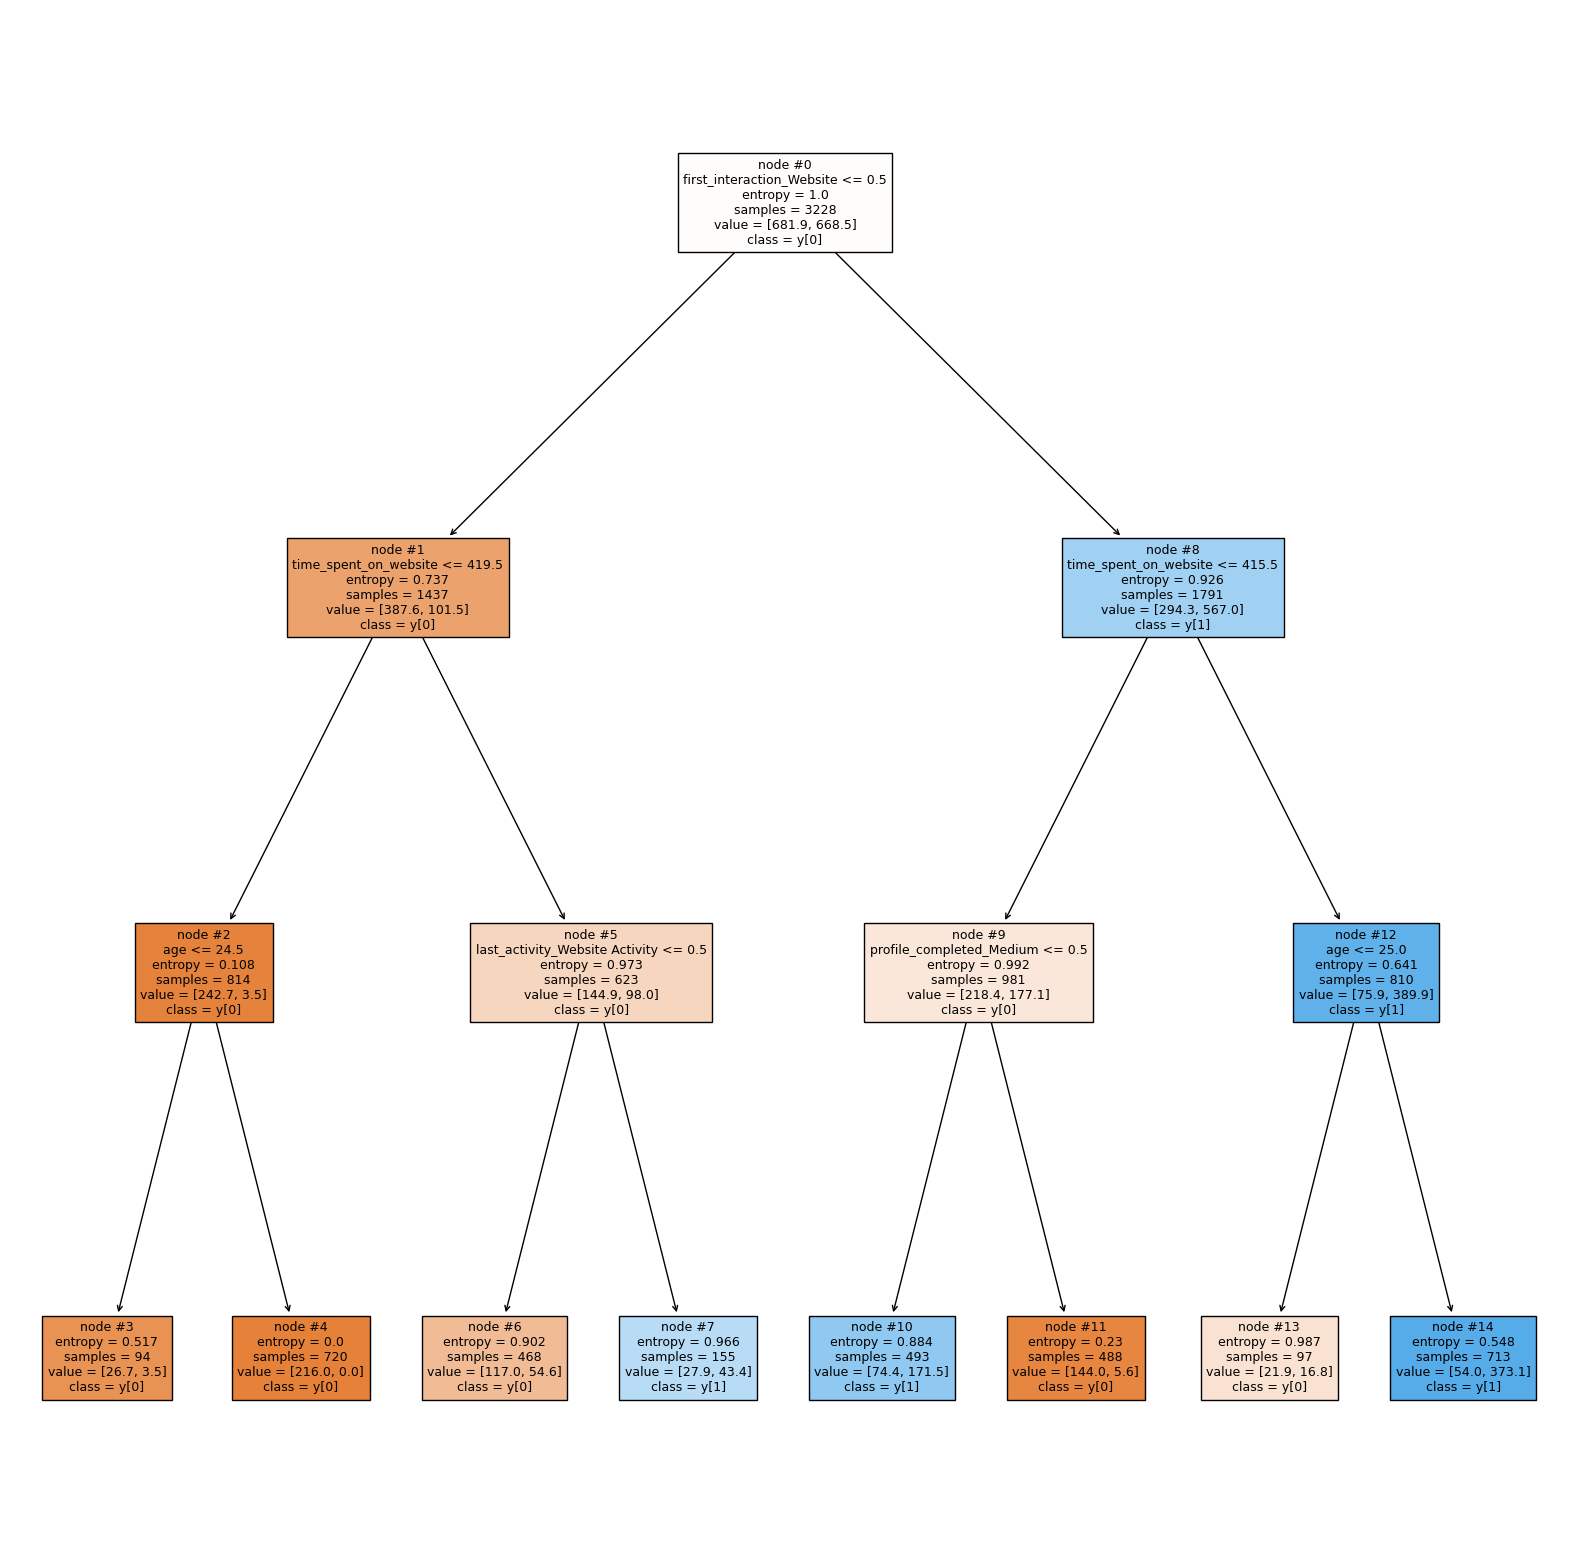

In [64]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

**Note:** Blue leaves represent the converted leads, i.e., **y[1]**, while the orange leaves represent the not converted leads, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Observations:_________**

**Let's look at the feature importance** of the tuned decision tree model

In [65]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website          0.34814
first_interaction_Website      0.32718
profile_completed_Medium       0.23927
age                            0.06389
last_activity_Website Activity 0.02151
website_visits                 0.00000
page_views_per_visit           0.00000
current_occupation_Student     0.00000
current_occupation_Unemployed  0.00000
profile_completed_Low          0.00000
last_activity_Phone Activity   0.00000
print_media_type1_Yes          0.00000
print_media_type2_Yes          0.00000
digital_media_Yes              0.00000
educational_channels_Yes       0.00000
referral_Yes                   0.00000


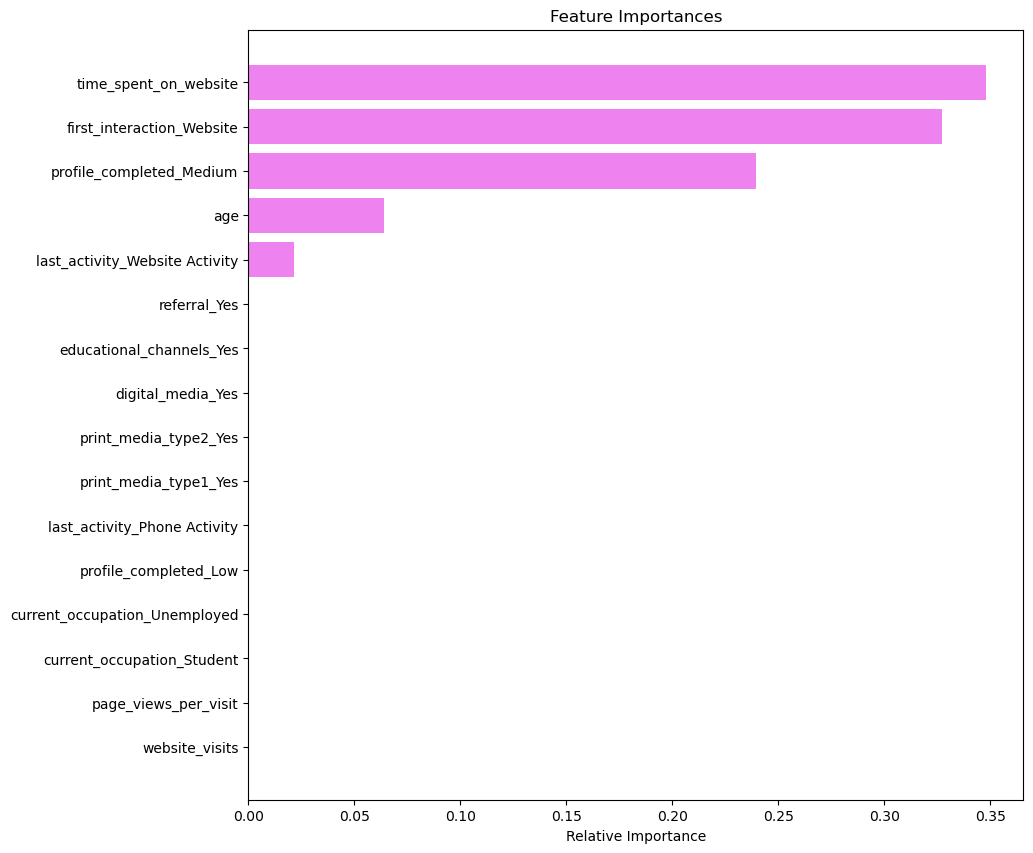

In [66]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

Observations: 
    Based on the feature importance values obtained from the random forest model, the following observations can be made:

The most important feature for predicting lead conversion is "time_spent_on_website" with an importance value of 0.34814. This indicates that the amount of time a lead spends on the website is a significant factor in determining their likelihood of conversion.

The second most important feature is "first_interaction_Website" with an importance value of 0.32718. This suggests that leads who initially interact with ExtraaLearn through the website have a higher chance of conversion.

The feature "profile_completed_Medium" has an importance value of 0.23927. This indicates that leads who have completed a medium percentage of their profile are more likely to convert.

The "age" feature has a lower importance value of 0.06389, suggesting that age plays a relatively smaller role in predicting lead conversion compared to the previously mentioned features.

The remaining features ("last_activity_Website Activity", "website_visits", "page_views_per_visit", "current_occupation_Student", "current_occupation_Unemployed", "profile_completed_Low", "last_activity_Phone Activity", "print_media_type1_Yes", "print_media_type2_Yes", "digital_media_Yes", "educational_channels_Yes", "referral_Yes") have importance values of 0.00000. This indicates that these features have minimal impact on the model's predictions of lead conversion.

Overall, the top three important features in predicting lead conversion are "time_spent_on_website," "first_interaction_Website," and "profile_completed_Medium." Understanding and focusing on these factors can help ExtraaLearn in identifying and targeting leads with a higher likelihood of conversion

## Do we need to prune the tree?

Hyperparameter tuning process has been performed properly and the model shows good performance on both the training and testing data, pruning the tree may not be necessary.

Now, let's build another model - **a random forest classifier.**

## Building a Random Forest model

### **Random Forest Classifier**

### Building Random Forest Model

In [67]:
# Fitting the random forest tree classifier on the training data
# rf_estimator = ___________

# rf_estimator.___________
rf_estimator = RandomForestClassifier(random_state=7)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=7)

**Let's check the performance of the model on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



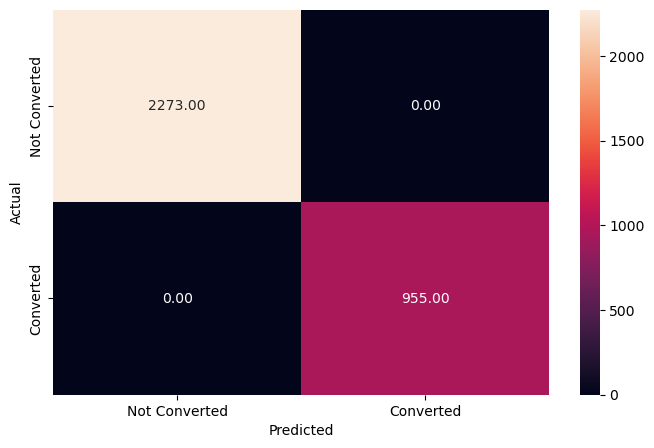

In [68]:
# Checking performance on the training data
# y_pred_train3 = ___________

# ___________
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

**Observations:Based on the performance of the Random Forest model on the training dataset, the following observations can be made:

Precision: The precision for both classes (0 and 1) is 1.00, indicating that the model has correctly predicted all the positive (converted) instances and all the negative (not converted) instances in the training data.

Recall: The recall for both classes is 1.00, which means that the model has identified and correctly predicted all the positive instances (converted leads) and all the negative instances (not converted leads) in the training data.

F1-Score: The F1-score for both classes is 1.00, which is the harmonic mean of precision and recall. The perfect F1-score indicates that the model has achieved a balance between precision and recall for both classes.

Support: The support represents the number of instances in each class. In this case, the model has 2273 instances of class 0 (not converted leads) and 955 instances of class 1 (converted leads) in the training data.

Accuracy: The overall accuracy of the model on the training data is 1.00, indicating that it has correctly predicted all instances.

Macro Avg and Weighted Avg: The macro average precision, recall, and F1-score are all 1.00, indicating the average performance across both classes. The weighted average precision, recall, and F1-score are also 1.00, taking into account the class imbalance in the dataset.

Based on these observations, it seems that the Random Forest model is performing extremely well on the training data, achieving perfect precision, recall, and accuracy. However, it's important to assess the model's performance on unseen data (testing data) to check for overfitting and validate its generalization ability**

**Let's check the performance on the testing data**

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       962
           1       0.80      0.69      0.74       422

    accuracy                           0.85      1384
   macro avg       0.84      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



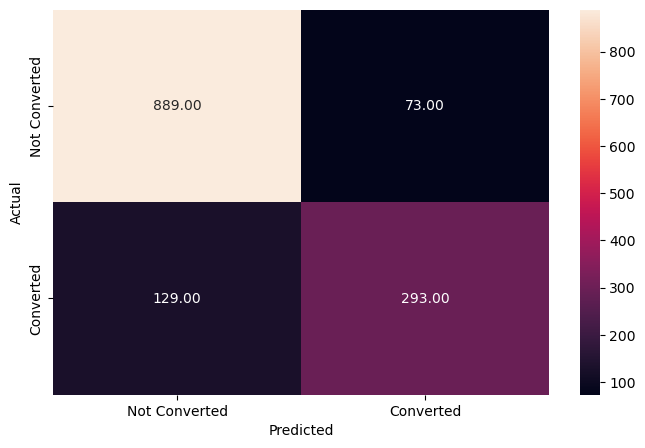

In [69]:
# Checking performance on the testing data
# y_pred_test3 = ___________

# ___________
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

**Observations:Based on the performance of the Random Forest model on the test dataset, the following observations can be made:

Precision: For class 0 (not converted leads), the precision is 0.87, indicating that 87% of the instances predicted as not converted leads are actually not converted leads. For class 1 (converted leads), the precision is 0.80, indicating that 80% of the instances predicted as converted leads are actually converted leads.

Recall: For class 0, the recall is 0.92, indicating that the model has identified and correctly predicted 92% of the actual not converted leads. For class 1, the recall is 0.69, indicating that the model has identified and correctly predicted 69% of the actual converted leads.

F1-Score: The F1-score for class 0 is 0.90, which is the harmonic mean of precision and recall. It represents the overall balance between precision and recall for predicting not converted leads. The F1-score for class 1 is 0.74, indicating the overall balance for predicting converted leads.

Support: The support represents the number of instances in each class. In this case, there are 962 instances of class 0 (not converted leads) and 422 instances of class 1 (converted leads) in the test data.

Accuracy: The overall accuracy of the model on the test data is 0.85, indicating that it has correctly predicted 85% of the instances in the test dataset.

Macro Avg and Weighted Avg: The macro average F1-score is 0.82, indicating the average performance across both classes. The weighted average F1-score is 0.85, taking into account the class imbalance in the dataset.

Based on these observations, it seems that the Random Forest model performs well on the test data, but there is a slight drop in precision, recall, and F1-score compared to the training data. The model shows relatively higher performance in predicting class 0 (not converted leads) compared to class 1 (converted leads). However, it still achieves a reasonable balance between precision and recall.

Overall, the Random Forest model demonstrates good generalization ability and performs well on the test data. It's important to monitor its performance in real-world scenarios and evaluate its effectiveness in practical applications.




**

**Let's see if we can get a better model by tuning the random forest classifier**

### **Random Forest Classifier - Hyperparameter Tuning**

Let's try **tuning some of the important hyperparameters of the Random Forest Classifier**. 

We will **not** tune the `criterion` hyperparameter as we know from hyperparameter tuning for decision trees that `entropy` is a better splitting criterion for this data.

In [70]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5

grid_obj = GridSearchCV(
    rf_estimator_tuned, parameters, scoring=scorer, cv=5
)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
# rf_estimator_tuned = ________________
# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#

# Checking performance on the training data


In [71]:
#  Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



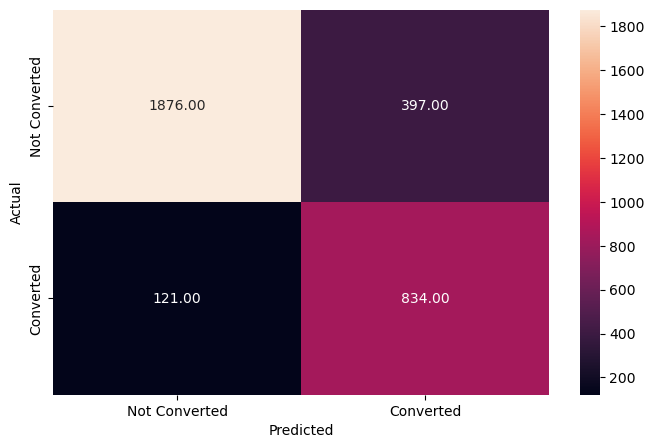

In [72]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train4)

Based on the performance of the Random Forest model after hyperparameter tuning on the training dataset, the following observations can be made:

Precision: For class 0 (not converted leads), the precision is 0.94, indicating that 94% of the instances predicted as not converted leads are actually not converted leads. For class 1 (converted leads), the precision is 0.68, indicating that 68% of the instances predicted as converted leads are actually converted leads.

Recall: For class 0, the recall is 0.83, indicating that the model has identified and correctly predicted 83% of the actual not converted leads. For class 1, the recall is 0.87, indicating that the model has identified and correctly predicted 87% of the actual converted leads.

F1-Score: The F1-score for class 0 is 0.88, which is the harmonic mean of precision and recall. It represents the overall balance between precision and recall for predicting not converted leads. The F1-score for class 1 is 0.76, indicating the overall balance for predicting converted leads.

Support: The support represents the number of instances in each class. In this case, there are 2273 instances of class 0 (not converted leads) and 955 instances of class 1 (converted leads) in the training data.

Accuracy: The overall accuracy of the model on the training data is 0.84, indicating that it has correctly predicted 84% of the instances in the training dataset.

Macro Avg and Weighted Avg: The macro average F1-score is 0.82, indicating the average performance across both classes. The weighted average F1-score is 0.84, taking into account the class imbalance in the dataset.

Based on these observations, it seems that the Random Forest model performs well on the training data after hyperparameter tuning. The model shows improved precision, recall, and F1-score compared to the initial model. However, there is still a trade-off between precision and recall, with relatively higher performance in predicting class 0 (not converted leads) compared to class 1 (converted leads).

It's important to evaluate the model's performance on the testing data to assess its generalization ability and check for overfitting.

**Let's check the model performance on the test data**

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       962
           1       0.68      0.85      0.76       422

    accuracy                           0.83      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.83      0.84      1384



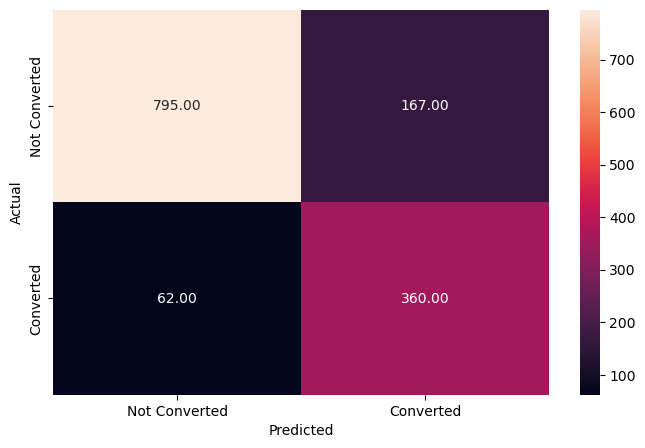

In [73]:
# Checking performance on the test data
y_pred_test4 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test4)

**Observations:Based on the performance of the Random Forest model after hyperparameter tuning on the test dataset, the following observations can be made:

Precision: For class 0 (not converted leads), the precision is 0.93, indicating that 93% of the instances predicted as not converted leads are actually not converted leads. For class 1 (converted leads), the precision is 0.68, indicating that 68% of the instances predicted as converted leads are actually converted leads.

Recall: For class 0, the recall is 0.83, indicating that the model has identified and correctly predicted 83% of the actual not converted leads. For class 1, the recall is 0.85, indicating that the model has identified and correctly predicted 85% of the actual converted leads.

F1-Score: The F1-score for class 0 is 0.87, which is the harmonic mean of precision and recall. It represents the overall balance between precision and recall for predicting not converted leads. The F1-score for class 1 is 0.76, indicating the overall balance for predicting converted leads.

Support: The support represents the number of instances in each class. In this case, there are 962 instances of class 0 (not converted leads) and 422 instances of class 1 (converted leads) in the test data.

Accuracy: The overall accuracy of the model on the test data is 0.83, indicating that it has correctly predicted 83% of the instances in the test dataset.

Macro Avg and Weighted Avg: The macro average F1-score is 0.82, indicating the average performance across both classes. The weighted average F1-score is 0.84, taking into account the class imbalance in the dataset.

Based on these observations, it seems that the Random Forest model performs reasonably well on the test data after hyperparameter tuning. The model shows a balance between precision and recall, although there is still a trade-off between the two. It is important to note that the model's performance on the test data is slightly lower than its performance on the training data, which suggests a potential for slight overfitting.**

**One of the drawbacks of ensemble models is that we lose the ability to obtain an interpretation of the model. We cannot observe the decision rules for random forests the way we did for decision trees. So, let's just check the feature importance of the model.**

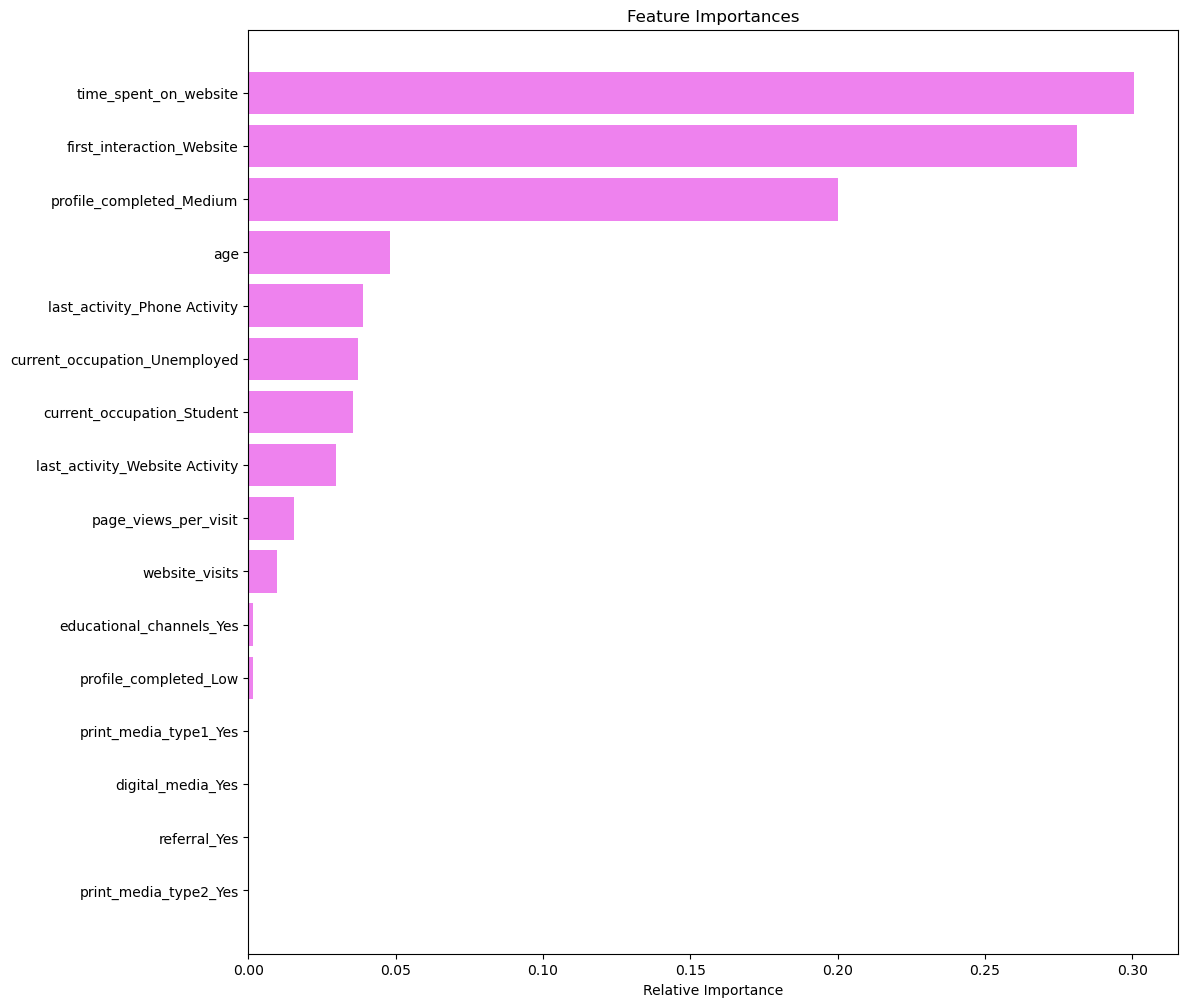

In [74]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- Similar to the decision tree model, **time spent on website, first_interaction_website, profile_completed, and age are the top four features** that help distinguish between not converted and converted leads.
- Unlike the decision tree, **the random forest gives some importance to other variables like occupation, page_views_per_visit, as well.** This implies that the random forest is giving importance to more factors in comparison to the decision tree.

## Do we need to prune the tree?

Random forests already have built-in mechanisms to reduce overfitting and improve generalization by aggregating predictions from multiple trees. Therefore there is no need for pruning

## Actionable Insights and Recommendations

Based on the analysis and  modeling performed for this project, here are some actionable insights and recommendations:

Time spent on the website and first interaction: The amount of time a lead spends on the website and their first interaction with ExtraaLearn (particularly through the website) are strong indicators of conversion likelihood. Focus on improving website engagement and optimizing user experience to increase the chances of lead conversion.

Profile completion: Leads who have completed a medium and high percentage of their profile are more likely to convert. Encourage users to fill out their profiles by offering incentives or highlighting the benefits of a complete profile. Make the profile completion process easy and user-friendly.

Age: While age plays a relatively smaller role in predicting lead conversion, consider segmenting and targeting specific age groups based on their preferences and needs. Tailor marketing strategies and educational offerings accordingly.

Lead nurturing: Develop a comprehensive lead nurturing strategy to engage with leads through various channels, including email, phone calls, and website activities. Maintain regular and personalized communication to provide relevant information and address their concerns effectively.

Digital marketing channels: Digital marketing channels such as social media, online forums, educational websites, and referrals play a vital role in generating leads. Invest in effective digital marketing strategies to reach a wider audience and leverage these channels to attract more leads.

Feature importance: The feature importance analysis reveals that time spent on the website, first interaction through the website, profile completion, and age are the top factors influencing lead conversion. Focus on optimizing these factors and allocate resources accordingly to maximize conversion rates.

Ongoing monitoring: Continuously monitor and evaluate the performance of the ML models and their predictions. Collect feedback from the sales team and analyze the conversion data to identify any areas for improvement. Regularly update and refine the models to ensure they remain effective in predicting lead conversion.

Expand data collection: Consider collecting additional data points or exploring external data sources to enhance the predictive power of the models. This could include gathering more information about lead demographics, educational backgrounds, or industry preferences.

Collaboration between sales and marketing teams: Foster collaboration and communication between the sales and marketing teams to ensure alignment in lead generation and conversion efforts. Regularly share insights and feedback to refine strategies and improve the overall lead conversion process.

